# Домашнее задание № 1

### Задача № 1:
Реализовать обучение линейной регрессии для задачи boston house prices (https://www.kaggle.com/vikrishnan/boston-house-prices) с использованием torch’а

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
import pandas as pd
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['PRICE'] = boston.target

Нормализируем данные:

In [ ]:
data = df[df.columns[:-1]]
data = data.apply(
    lambda x: (x - x.mean()) / x.std()
)

data['Price'] = df.PRICE

In [ ]:
data.head()

In [ ]:
import numpy as np

X = data.drop('Price', axis=1).to_numpy()
Y = data['Price'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
import torch
print(torch.__version__)

In [ ]:
n_train = X_train.shape[0]
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
Y_train = torch.tensor(Y_train, dtype=torch.float).view(-1, 1)
Y_test = torch.tensor(Y_test, dtype=torch.float).view(-1, 1)

Конструируем нейронную сеть:

In [ ]:
w_num = X_train.shape[1]

net = torch.nn.Sequential(
    torch.nn.Linear(w_num, 1)
)

torch.nn.init.normal_(net[0].weight, mean=0, std=0.1)
torch.nn.init.constant_(net[0].bias, val=0)

Итератор для batch:

In [ ]:
datasets = torch.utils.data.TensorDataset(X_train, Y_train)

In [ ]:
train_iter = torch.utils.data.DataLoader(datasets, batch_size=10, shuffle=True)

Функция потерь и оптимизатор:

In [ ]:
loss = torch.nn.MSELoss()

In [ ]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)

Обучение и результат:

In [ ]:
num_epochs = 5
for epoch in range(num_epochs):
    for x, y in train_iter:
        output = net(x)
        l = loss(output, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print("epoch {} loss: {:.4f}".format(epoch + 1, l.item()))

In [ ]:
print(loss(net(X_test), Y_test).item())

In [ ]:
import matplotlib.pyplot as plt

py = net(X_train)
plt.plot(Y_train, py.detach().numpy(), '+')
plt.xlabel('Actual value')
plt.ylabel('Prediction value')

In [ ]:
from torch.autograd import Variable
from sklearn.metrics import r2_score

X = Variable(torch.FloatTensor(X_train)) 
result = net(X)
pred=result.data[:,0].numpy()
print(len(pred),len(Y_train))
r2_score(pred,Y_train)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)
print('R2 for Train', lm.score(X_train, Y_train))
print('R2 for Test', lm.score(X_test, Y_test))

Вывод: по сравнению с обычной линейной регрессией, нейроная сеть pytorch показала результаты хуже

### Задача № 2
** Реализовать наивный баесовский классификатор для MNIST (взяв всего 2 цифры “1” и “2”) сравнить с sclearn’овским

In [106]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from time import time

In [25]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

#Выбираем только изображение цифр 1 или 2:
X = X[np.logical_or(y == 1, y == 2)]
y = y[np.logical_or(y == 1, y == 2)]

# проверка выборки
print(np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5)

[1 2]


In [113]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train)

predicted = model.predict(X_test)
accuracy_score(y_test, predicted)

0.9166666666666666

In [114]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           1       0.89      0.96      0.92        93
           2       0.95      0.87      0.91        87

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180



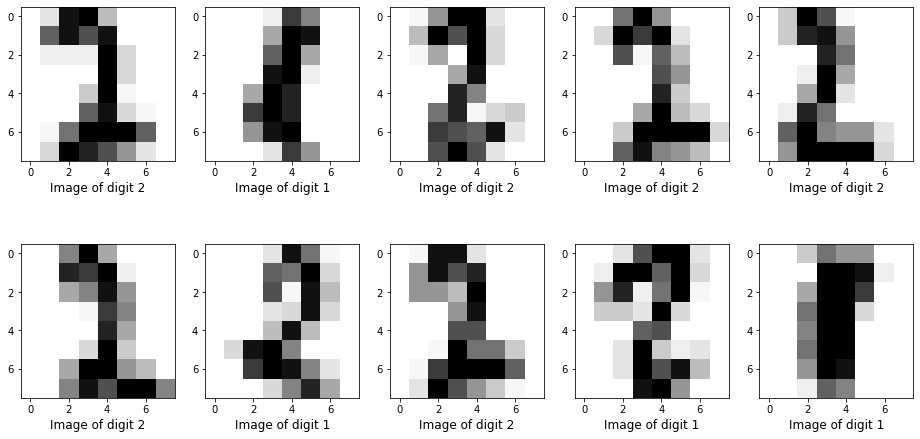

In [115]:
plt.figure(figsize=(16,8))

for i in range(0,10):
    plt.subplot(2,5, int(i)+1)
    img = X_test[i].reshape(8,8)
    plt.imshow(img, cmap="Greys")
    plt.xlabel('Image of digit '+str(predicted[i]),fontsize = 12)